# PDA Project Assignment - Samuele Ceol

## Classification task on Stroke Prediction Dataset

## Table of Contents
* [CHAPTER 0 - INTRODUCTION](#0)
    * [Section 0.1 - Project rationale & objective](#0.1)
    * [Section 0.2 - Dataset exploration](#0.2)
* [CHAPTER 1 - DATA CURATION](#1)
* [CHAPTER 2 - DEVELOPMENT OF A DECISION TREE ALGORITHM](#2)
* [CHAPTER 3 - TRAINING THE ALGORITHM](#3)
* [CHAPTER 4 - COMPARING RESULTS WITH AN EXISTING SOLUTION](#4)
* [CHAPTER 5 - CONCLUSIONS](#5)

# CHAPTER 0 - INTRODUCTION <a class="anchor" id="0"></a>

## Section 0.1 - Project rationale & objective <a class="anchor" id="0.1"></a>

## Section 0.2 - Dataset exploration <a class="anchor" id="0.2"></a>

In [1]:
# This block contains all the libraries used in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

df.shape

(5110, 12)

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print(df.gender.unique())
print(df.ever_married.unique())
print(df.work_type.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

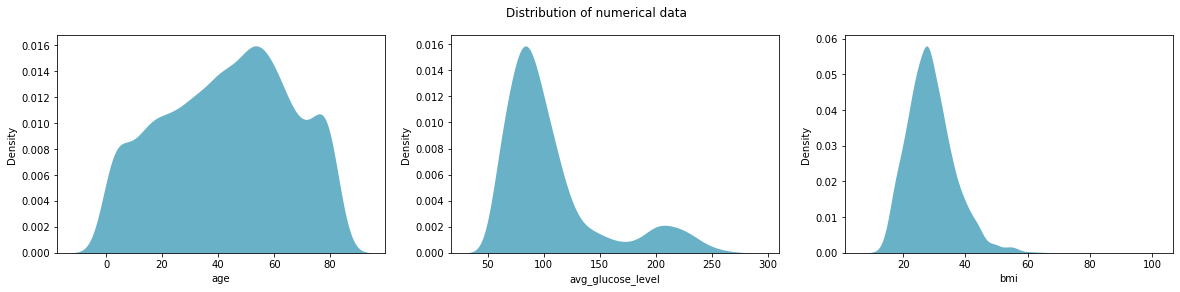

In [25]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
subplot = 131

fig = plt.figure(figsize=(20, 4))

for i in numeric_features:
    plt.subplot(subplot)

    sns.kdeplot(
        x=i,
        palette='crest',
        alpha=.75,
        color='#3697b5',
        shade=True,
        linewidth=0,
        data=df
    )

    subplot += 1

plt.suptitle('Distribution of numerical data')
plt.show()

<Figure size 1440x720 with 0 Axes>

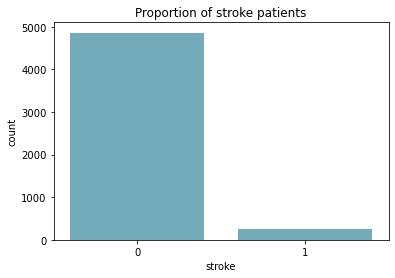

<Figure size 1440x720 with 0 Axes>

In [24]:
sns.countplot(
    x='stroke',  
    alpha=.75,
    color='#3697b5',
    edgecolor='black',
    linewidth=0,
    data=df,
)

plt.title("Proportion of stroke patients")
plt.figure(figsize=(20, 10))

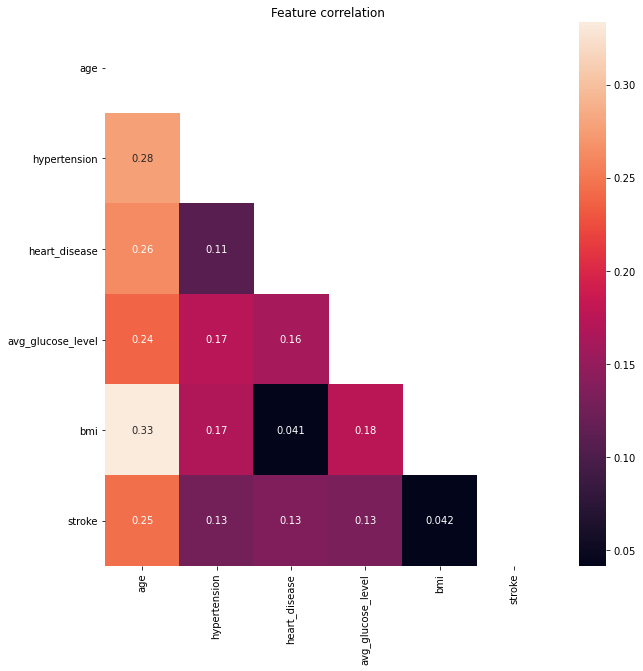

In [84]:
plt.figure(figsize=(10, 10))
plt.title('Feature correlation')

df_corr = df.drop(['id'], axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    df_corr, 
    linecolor='black', 
    mask=mask,
    annot=True)
plt.show()

# CHAPTER 1 - DATA CURATION <a class="anchor" id="1"></a>

In [85]:
## Removing ids
df = df.drop(['id'], axis=1)

In [86]:
## Trasforming textual values to numeric 
## gender, ever-married, work_type, Residence_type, smoking_status
cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for i in range(len(cols_to_encode)):
    df[cols_to_encode[i]] = LabelEncoder().fit_transform(df[cols_to_encode[i]])

In [ ]:
## Handling NaN values

## Handling unbalanced data

# CHAPTER 2 - DEVELOPMENT OF A DECISION TREE ALGORITHM <a class="anchor" id="2"></a>

# CHAPTER 3 - TRAINING THE ALGORITHM <a class="anchor" id="3"></a>

# CHAPTER 4 - COMPARING RESULTS WITH AN EXISTING SOLUTION <a class="anchor" id="4"></a>

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X  = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
rf_cv = cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1').mean())

base/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py", line 644, in check_array
    _assert_all_finite(array,
  File "/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py", line 96, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  warnings.warn("Es

# CHAPTER 5 - CONCLUSIONS <a class="anchor" id="5"></a>